# Digital IR Thermometer Simulation
## Done by :- Somantha Manuranga

This simulation shows how digital infrared (IR) thermometer takes temperature readings repeatedly over 60 seconds ot time.It helps to see how the readings can change slightly each and every time becasue of small errors , noises.

## Simulated Aspect

A digital infrared (IR) thermometer checks an object's temperature by detecting the heat which is coming from its surface wihtout touching the object.This each and every reading happens very fast.Which means less than a second. To simulate the 60 seconds period of time we need to repeat the readings over this time period

During the 60 seconds of period of time we have to take many fast temperature readings.Like one time or two times per second. However the main objective is to show how these readigns can slightly change even if the objects surface temperature steady state. Noises like small changes of environment , sensor limits can be causes for these variations of the measured temperature.
Therefore, our simulation models a target temperature and adds a random component to each reading to represent this typical measurement variability.

## Basis Formula for the Simulation

The fundamental physical principle relating the temperature of an object to the thermal radiation it emits is the **Stefan-Boltzmann Law**. For a perfect blackbody, the power ($P$) radiated per unit area ($A$) is given by:

$$ \frac{P}{A} = \epsilon \sigma T^4 $$

where:
-   $P/A$ is the radiant power emitted per unit area (W/m²)
-   $\epsilon$ is emissivity (how efficiently a surface emits radiation)
-   $\sigma$ is the Stefan-Boltzmann constant ($\approx 5.67 \times 10^{-8} \text{ W/(m}^2\text{K}^4\text{)}$)
-   $T$ is the absolute temperature of the object in Kelvin (K)

  Also IR thermometers sonsor detects a signal S that is proportional to this emitted power,

$$ S \propto \epsilon T^4$$
  

For a real object (not a perfect blackbody), the formula is modified by its **emissivity** ($\epsilon$), a value between 0 and 1. A perfect blackbody absorbs and emits 100% of radiation while real objects absorb and emit only a part of it.

In real world device the detected signal is affected by the object's true emissivity and temperature as well as the sensor noise,

$$ S_{detected} = K \times \epsilon_{true} \times (T_{true})^4 + \text{Noise} $$

Where K is a constant related to the sensor characteristics.But the thermometer has fixed emissivity , ($\epsilon_{calib}$) during the calibration and calculates the measured temperature using,


$$ T_{measured} = \left( \frac{S_{detected}}{K \times \epsilon_{calib}} \right)^{1/4} $$

It means any difference between actual and assumed emissivity along with noise can cause errors in the measured temperature.


The core *formula for this simulation* is much simpler. It describes how a single simulated measured reading is derived from a hypothetical true temperature and the inherent measurement variability.

The formula for each simulated reading is:

$$ \text{Measured Temperature} = \text{Ideal Temperature} + \text{Measurement Variation (Noise)} $$


## Calculation Process

For this simulation, I set up that how long  it will run, how often readings are taken, true body temperature (like 37°C) , how noises effected to the readings .Then figured out how many temperature readings we need according to the set up time and interval. For every time interval a small random error was created usign a normal distribution which is same as the real world measurement noise. This random error was added to the ideal temperature to get the simulated reading. Lastly Average temperature,  how the readings vary and what the highest and lowest temperatures were measured.

In [13]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Libraries imported: numpy, matplotlib.pyplot, pandas.")

Libraries imported: numpy, matplotlib.pyplot, pandas.


In [14]:

# Define the parameters that control the simulation behavior.

simulation_duration_seconds = 60         
measurement_interval_seconds = 0.5       
ideal_body_temperature_celsius = 37.0   
noise_celsius = 0.15   # Standard deviation of simulated noise (°C)

num_readings = int(simulation_duration_seconds / measurement_interval_seconds) + 1 # total number of readings

print(f"-Simulation Setup-")
print(f"Simulating a total duration of: {simulation_duration_seconds} seconds")
print(f"Taking a simulated reading approximately every: {measurement_interval_seconds} seconds")
print(f"This will result in a total of: {num_readings} simulated readings")
print(f"The underlying ideal temperature is set to: {ideal_body_temperature_celsius}°C")
print(f"The simulated variability (noise) is: {noise_celsius}°C")
print("\nSimulation parameters defined.")

-Simulation Setup-
Simulating a total duration of: 60 seconds
Taking a simulated reading approximately every: 0.5 seconds
This will result in a total of: 121 simulated readings
The underlying ideal temperature is set to: 37.0°C
The simulated variability (noise) is: 0.15°C

Simulation parameters defined.


In [9]:

time_points = np.linspace(0, simulation_duration_seconds, num_readings) # Generate squence of time points and evenly spaced values over this time interval

measurement_noise = np.random.normal(
    loc=0,
    scale=noise_celsius,
    size=num_readings
) #Added random noise for each reading

# Calculate the simulated temperature by adding noise to the ideal temperature.
simulated_temperatures = ideal_body_temperature_celsius + measurement_noise

print("Simulated data generation complete.")
print(f"Generated an array of {len(time_points)} time points and {len(simulated_temperatures)} temperature readings.")

Simulated data generation complete.
Generated an array of 121 time points and 121 temperature readings.


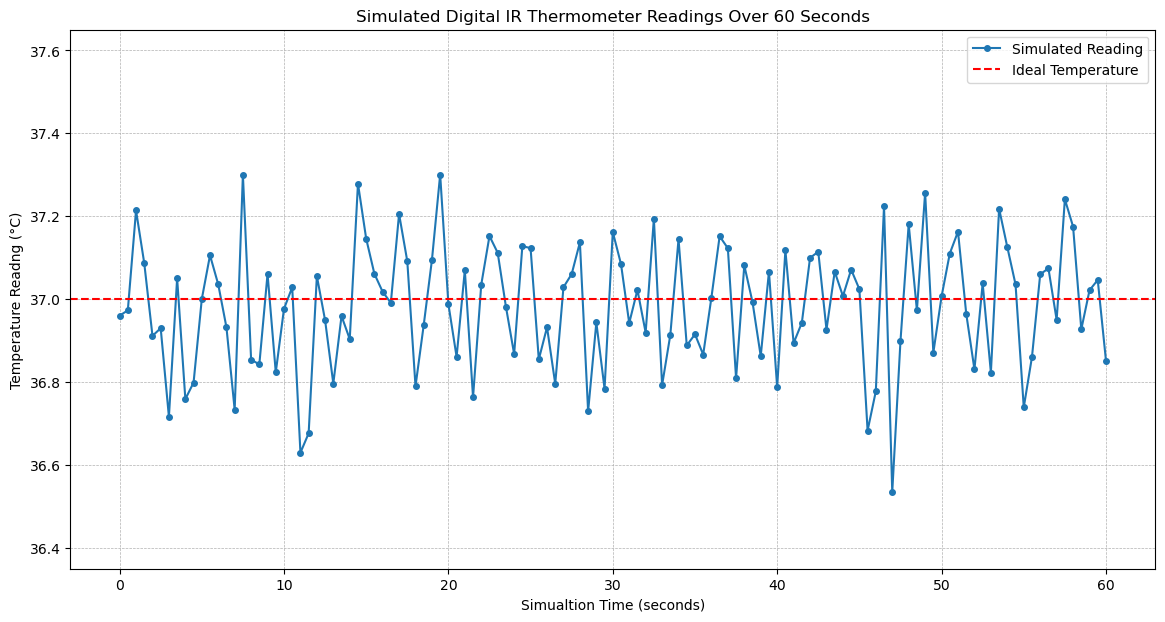

Plot of simulated readings generated.


In [15]:

# Visualize the simulated data using a line plot 
plt.figure(figsize=(14, 7)) 

# Plot the simulated temperature readings
plt.plot(time_points, simulated_temperatures,
         marker='o',         
         linestyle='-',     
         markersize=4,       
         label='Simulated Reading') 

# Ideal temperature as a horizontal reference line
plt.axhline(y=ideal_body_temperature_celsius,
            color='r',           
            linestyle='--',     
            label='Ideal Temperature')

plt.title('Simulated Digital IR Thermometer Readings Over 60 Seconds') 
plt.xlabel('Simualtion Time (seconds)') 
plt.ylabel('Temperature Readng (°C)') 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

y_lower_limit = ideal_body_temperature_celsius - 3 * noise_celsius - 0.2 
y_upper_limit = ideal_body_temperature_celsius + 3 * noise_celsius + 0.2 
plt.ylim(y_lower_limit, y_upper_limit)

plt.legend() 
plt.savefig('myplot.png')  
plt.show() 
print("Plot of simulated readings generated.")

In [10]:


# Create a dataframe to hold time points and simulated temperatures
results_df = pd.DataFrame({
    'Time (s)': time_points,
    'Temperature (°C)': simulated_temperatures
})

print("--- Simulated Readings Table ---")
print("Showing first 10 readings:")
print(results_df.head(10).to_string(index=False))
print("\n...")
print(f"\nShowing last 10 readings (out of {num_readings}):")
print(results_df.tail(10).to_string(index=False))

# Summary of the Statistics
mean_temp = np.mean(simulated_temperatures)
std_dev_temp = np.std(simulated_temperatures) # Sample standard deviation
min_temp = np.min(simulated_temperatures)
max_temp = np.max(simulated_temperatures)

print("\n--- Summary Statistics of Simulated Readings ---")
print(f"Total Number of Readings: {num_readings}")
print(f"Mean Temperature: {mean_temp:.3f}°C")       
print(f"Standard Deviation: {std_dev_temp:.3f}°C")   
print(f"Minimum Reading: {min_temp:.3f}°C")       
print(f"Maximum Reading: {max_temp:.3f}°C")           

print("\nSimulated data table and summary statistics displayed.")

--- Simulated Readings Table ---
Showing first 10 readings:
 Time (s)  Temperature (°C)
      0.0         36.960420
      0.5         36.973140
      1.0         37.214071
      1.5         37.086875
      2.0         36.911627
      2.5         36.930152
      3.0         36.716337
      3.5         37.050482
      4.0         36.759084
      4.5         36.798943

...

Showing last 10 readings (out of 121):
 Time (s)  Temperature (°C)
     55.5         36.860951
     56.0         37.059987
     56.5         37.074578
     57.0         36.950225
     57.5         37.241203
     58.0         37.175137
     58.5         36.927376
     59.0         37.021653
     59.5         37.046497
     60.0         36.852179

--- Summary Statistics of Simulated Readings ---
Total Number of Readings: 121
Mean Temperature: 36.983°C
Standard Deviation: 0.152°C
Minimum Reading: 36.535°C
Maximum Reading: 37.301°C

Simulated data table and summary statistics displayed.


## Simulation Results Analysis

**Analysis of Results:**

In this plot it shows that simulated temperature readings go little bit of up and down around the ideal temperature over the 60 seconds period of time.Each blue dot represents that temperature reading taken at a certain time. Those readings were not stay constant beacuse of the random noise was added to make it more like real life measurement.With this plot we can observe avrage of all temperature values (Mean) , typical spread of the readings around the mean(standard deviation) , minimum and maximum temperatures and overall variation of the readings.



## Implementation to a Advanced Simulation Model

Above we considered only noise. When paying attention to the real world scenario another kinds of aspects are there.Throughout the 60 seconds obejct will not maintain the same temperature. So it will cool down.It means temperature drift is there.Another thing is emissivity is not the same becuase of the differences in the surface properties can effect the readings. Not only that during this period spikes can be happen. These real world aspects are considered here in this implementation stage.

To make readings more realiable here I used moving avaerage filter which smooths the data by avaeraging a few recent values instead of showing just one reading. This approach helps to reduce small ups and downs cause by other facotrs.Also use the outlier rejection to ignore any incorrect readings that are too far from the normal reading.

### Implemented Formula

#### 1. Emissivity Error (Systematic Bias)
The core physical principle is the Stefan-Boltzmann Law ($P \propto \epsilon T^4$).But there is an error if the device's calibrated emissivity ($\epsilon_{\text{calib}}$) does not match with the true emissivity ($\epsilon_{\text{true}}$).

-   Detected Power Signal: $S_{\text{detected}} \propto \epsilon_{\text{true}} \times (T_{\text{true}})^4$
-   Calculated Temperature (by device): $T_{\text{calc}} = \left( \frac{S_{\text{detected}}}{K \times \epsilon_{\text{calib}}} \right)^{1/4}$\
This shows bias reading.
With these real world scenarios core formula can be shown as below.

$$ T_{\text{raw}} = (T_{\text{ideal}} + T_{\text{drift}}) + T_{\text{emissivity\_offset}} + \text{Noise} $$

##### Moving Average Filter
At each step we look back the last N reading values and average them and use that as the new smoothed temperature.It is like if we take 5th reading , the filtered temperature will be the average of the 3 most recent raw readings.

$$ T_{\text{filtered}}(i) = \frac{1}{N} \sum_{j=i-N+1}^{i} T_{\text{raw}}(j) $$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider

print("Libraries imported: numpy, matplotlib.pyplot, pandas, ipywidgets.")

# -Simulation Setup
simulation_duration_seconds = 60
measurement_interval_seconds = 0.5
ideal_body_temperature_celsius = 37.0


noise_celsius = 0.15  # Standard deviation of the random noise

# Drift (Time-varying change)
drift_celsius_per_minute = -0.1 
emissivity_offset_celsius = -0.1 
outlier_time_seconds = 30 
outlier_magnitude_celsius = 1.0 


moving_average_window_size = 5 
outlier_rejection_threshold_std = 3.0 


num_readings = int(simulation_duration_seconds / measurement_interval_seconds) + 1

print("Simulation parameters defined.")

time_points = np.linspace(0, simulation_duration_seconds, num_readings)

total_drift = np.linspace(0, drift_celsius_per_minute, num_readings)

measurement_noise = np.random.normal(loc=0, scale=noise_celsius, size=num_readings)# Generate random noise for each reading

base_temperature = ideal_body_temperature_celsius + total_drift + emissivity_offset_celsius

raw_simulated_temperatures = base_temperature + measurement_noise

#Introduce an Outlier
outlier_index = np.argmin(np.abs(time_points - outlier_time_seconds))
raw_simulated_temperatures[outlier_index] += outlier_magnitude_celsius

# Apply Signal Processing
raw_series = pd.Series(raw_simulated_temperatures)

# Apply a moving average filter
filtered_temperatures = raw_series.rolling(window=moving_average_window_size, min_periods=1).mean()

# Apply outlier rejection
mean_raw = raw_series.mean()
std_raw = raw_series.std()
threshold = outlier_rejection_threshold_std * std_raw
is_not_outlier = (raw_series - mean_raw).abs() < threshold
cleaned_temperatures = raw_series.where(is_not_outlier)

print(f"Data generation and processing complete for {num_readings} readings.")
print(f"Outlier of +{outlier_magnitude_celsius}°C added at t={time_points[outlier_index]:.1f}s.")
print(f"Outlier at index {outlier_index} was flagged as '{not is_not_outlier[outlier_index]}'.")

Libraries imported: numpy, matplotlib.pyplot, pandas, ipywidgets.
Simulation parameters defined.
Data generation and processing complete for 121 readings.
Outlier of +1.0°C added at t=30.0s.
Outlier at index 60 was flagged as 'True'.


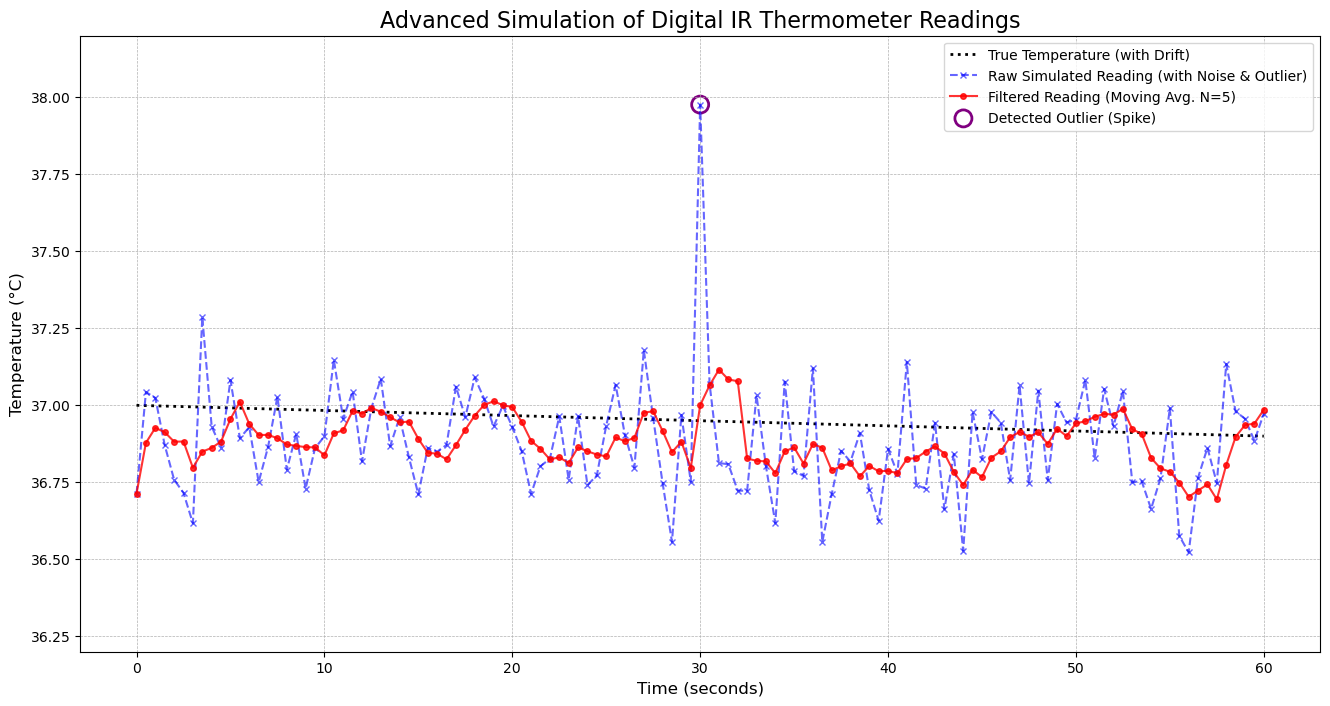

Plot generated.


In [16]:
#Visualize the results
plt.figure(figsize=(16, 8))

# True temperature (ideal + drift) as a reference
plt.plot(time_points, ideal_body_temperature_celsius + total_drift,
         color='black', linestyle=':', linewidth=2, label='True Temperature (with Drift)')

# Raw data with noise and outlier
plt.plot(time_points, raw_simulated_temperatures,
         marker='x', linestyle='--', color='blue', markersize=5, alpha=0.6, label='Raw Simulated Reading (with Noise & Outlier)')

# Smoothed data using moving average
plt.plot(time_points, filtered_temperatures,
         marker='o', linestyle='-', color='red', markersize=4, alpha=0.8, label=f'Filtered Reading (Moving Avg. N={moving_average_window_size})')

# Highlight the outlier
plt.scatter(time_points[outlier_index], raw_simulated_temperatures[outlier_index],
            s=150, facecolors='none', edgecolors='purple', linewidth=2, label=f'Detected Outlier (Spike)')

plt.title('Advanced Simulation of Digital IR Thermometer Readings', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.ylim(ideal_body_temperature_celsius - 0.8, ideal_body_temperature_celsius + 1.2)
plt.legend() 
plt.savefig('Implementedplot.png') 
plt.show()

print("Plot generated.")

### Results analysis after implementation and Conclusion

This plot shows how effect real world errors in thermometers readings. Thhe true temperature slowly drops dwon over time but the raw readings were always little bit lower becuase of constant -0.1 celcius bias. Earlier add noise into the raw data and it makes values jump slighly up and down.

Mid of the time period large spike was added which pushes the maximum value and affects the average and standard deviation. After removing the outlier cleaned data becomes more accurate.Finally red line shows filtered data using a moving average.it was much smoother and less variation.
